## **Temperature change**

The case study is about temperature change in Cambodia. It's actually a biginner level of data analysis.


In [3]:
# libraries used
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics

%matplotlib inline

**Load the Data**


In [4]:
#call data
dat = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin1')
dat.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


### **1. Exploratory Data Analysis**
#### **1.1 Data Cleaning**
##### 1.1.1. Check Variables and Data type

*Check Columns*

In [5]:
print(dat.columns)

Index(['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')


*Data type*

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

#### **1.2 Data collection**

***Collect from specific Area***

##### **1.2.1. Collect Data of Cambodia**

In [7]:
#collect data of Cambodia from all dataset
df_bodia = dat[dat['Area'] == 'Cambodia']
df_bodia.head()


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
1190,115,Cambodia,7001,January,7271,Temperature change,°C,-0.343,-0.768,-2.063,...,1.684,0.397,1.584,1.493,-0.741,0.332,2.198,2.345,1.398,1.890
1191,115,Cambodia,7001,January,6078,Standard Deviation,°C,1.046,1.046,1.046,...,1.046,1.046,1.046,1.046,1.046,1.046,1.046,1.046,1.046,1.046
1192,115,Cambodia,7002,February,7271,Temperature change,°C,0.349,-1.195,-1.075,...,1.798,0.450,1.150,1.727,-0.094,0.325,0.147,0.803,-0.200,2.226
1193,115,Cambodia,7002,February,6078,Standard Deviation,°C,0.648,0.648,0.648,...,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648
1194,115,Cambodia,7003,March,7271,Temperature change,°C,0.231,-0.220,-0.916,...,0.914,-1.072,0.871,1.247,0.851,1.072,1.277,0.772,0.275,1.408


##### **1.2.2. Collect data of Tempreture change of Cambodia**

In [8]:
#collect data of tempreture change from all data of Cambodia
df_bodia_temp = df_bodia[df_bodia['Element'] == 'Temperature change']
df_bodia_temp.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
1190,115,Cambodia,7001,January,7271,Temperature change,°C,-0.343,-0.768,-2.063,...,1.684,0.397,1.584,1.493,-0.741,0.332,2.198,2.345,1.398,1.890
1192,115,Cambodia,7002,February,7271,Temperature change,°C,0.349,-1.195,-1.075,...,1.798,0.450,1.150,1.727,-0.094,0.325,0.147,0.803,-0.200,2.226
1194,115,Cambodia,7003,March,7271,Temperature change,°C,0.231,-0.220,-0.916,...,0.914,-1.072,0.871,1.247,0.851,1.072,1.277,0.772,0.275,1.408
1196,115,Cambodia,7004,April,7271,Temperature change,°C,-0.080,-0.158,-0.395,...,1.151,-0.804,0.283,0.638,0.538,0.632,2.084,0.533,0.051,1.527
1198,115,Cambodia,7005,May,7271,Temperature change,°C,-0.319,0.055,0.510,...,1.623,0.309,0.000,0.911,1.258,1.244,1.443,0.527,0.626,1.033


##### **1.2.3. Collect data of Standard deviation of Tempreture of Cambodia**

In [9]:
#collect data of standard deviation
df_bodia_temp_std = df_bodia[df_bodia['Element'] == 'Standard Deviation']
df_bodia_temp_std.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
1191,115,Cambodia,7001,January,6078,Standard Deviation,°C,1.046,1.046,1.046,...,1.046,1.046,1.046,1.046,1.046,1.046,1.046,1.046,1.046,1.046
1193,115,Cambodia,7002,February,6078,Standard Deviation,°C,0.648,0.648,0.648,...,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648,0.648
1195,115,Cambodia,7003,March,6078,Standard Deviation,°C,0.599,0.599,0.599,...,0.599,0.599,0.599,0.599,0.599,0.599,0.599,0.599,0.599,0.599
1197,115,Cambodia,7004,April,6078,Standard Deviation,°C,0.470,0.470,0.470,...,0.470,0.470,0.470,0.470,0.470,0.470,0.470,0.470,0.470,0.470
1199,115,Cambodia,7005,May,6078,Standard Deviation,°C,0.499,0.499,0.499,...,0.499,0.499,0.499,0.499,0.499,0.499,0.499,0.499,0.499,0.499


#### **1.3. Check Missing value**

In [10]:
#Check missing value
df_bodia.isnull().sum()

Area Code       0
Area            0
Months Code     0
Months          0
Element Code    0
               ..
Y2015           0
Y2016           0
Y2017           0
Y2018           0
Y2019           0
Length: 66, dtype: int64

#### **1.4. Check duplicate Data**

In [11]:
df_bodia_temp.duplicated().sum()

np.int64(0)

In [12]:
df_bodia_temp_std.duplicated().sum()

np.int64(0)

#### **1.5. Calculate descriptive of Statistics**

*Describe statistic of numerical variableSolution*

In [13]:
# Select columns from the 5th column onwards
numerical_data_temp = df_bodia_temp.iloc[:, 5:]

# Calculate descriptive statistics
numerical_stats = numerical_data_temp.describe()

# Display the statistics
numerical_stats


,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,-0.004588,-0.203529,-0.277176,0.092059,-0.061235,0.411059,-0.179647,0.051353,0.431412,0.132235,...,1.088882,0.296059,0.880353,0.776588,0.640118,1.134000,1.335588,1.002765,0.804235,1.380706
std,0.282652,0.385614,0.709817,0.649088,0.625477,0.532483,0.375836,0.604623,0.663728,0.245987,...,0.406703,0.620482,0.627924,0.606263,0.611917,0.584498,0.505989,0.513337,0.690755,0.427342
min,-0.431000,-1.195000,-2.063000,-1.100000,-1.381000,-0.684000,-0.960000,-1.004000,-0.630000,-0.215000,...,0.358000,-1.072000,0.000000,-0.543000,-0.741000,0.325000,0.147000,0.172000,-0.200000,0.711000
25%,-0.155000,-0.220000,-0.395000,-0.236000,-0.343000,0.062000,-0.371000,-0.318000,0.037000,-0.028000,...,0.794000,0.210000,0.385000,0.412000,0.538000,0.892000,1.056000,0.675000,0.369000,1.033000
50%,-0.056000,-0.108000,-0.115000,0.114000,-0.134000,0.374000,-0.119000,0.095000,0.474000,0.031000,...,1.094000,0.357000,0.871000,0.638000,0.737000,1.072000,1.373000,0.946000,0.626000,1.408000
75%,0.147000,0.015000,0.181000,0.449000,0.293000,0.740000,0.042000,0.219000,0.731000,0.395000,...,1.229000,0.591000,1.150000,1.139000,0.882000,1.220000,1.601000,1.231000,1.361000,1.527000
max,0.589000,0.294000,0.767000,1.721000,1.453000,1.263000,0.389000,1.624000,2.086000,0.565000,...,1.798000,1.570000,2.358000,1.859000,1.776000,2.442000,2.198000,2.345000,2.296000,2.226000


In [14]:
numerical_data_temp_std = df_bodia_temp_std.iloc[:, 5:]

# Calculate descriptive statistics
numerical_stats_std = numerical_data_temp_std.describe()

# Display the statistics
numerical_stats_std


,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.470059,0.470059,0.470059,0.470059,0.470059,0.470059,0.470059,0.470059,0.470059,0.470059,...,0.470059,0.470059,0.470059,0.470059,0.470059,0.470059,0.470059,0.470059,0.470059,0.470059
std,0.242270,0.242270,0.242270,0.242270,0.242270,0.242270,0.242270,0.242270,0.242270,0.242270,...,0.242270,0.242270,0.242270,0.242270,0.242270,0.242270,0.242270,0.242270,0.242270,0.242270
min,0.173000,0.173000,0.173000,0.173000,0.173000,0.173000,0.173000,0.173000,0.173000,0.173000,...,0.173000,0.173000,0.173000,0.173000,0.173000,0.173000,0.173000,0.173000,0.173000,0.173000
25%,0.288000,0.288000,0.288000,0.288000,0.288000,0.288000,0.288000,0.288000,0.288000,0.288000,...,0.288000,0.288000,0.288000,0.288000,0.288000,0.288000,0.288000,0.288000,0.288000,0.288000
50%,0.409000,0.409000,0.409000,0.409000,0.409000,0.409000,0.409000,0.409000,0.409000,0.409000,...,0.409000,0.409000,0.409000,0.409000,0.409000,0.409000,0.409000,0.409000,0.409000,0.409000
75%,0.624000,0.624000,0.624000,0.624000,0.624000,0.624000,0.624000,0.624000,0.624000,0.624000,...,0.624000,0.624000,0.624000,0.624000,0.624000,0.624000,0.624000,0.624000,0.624000,0.624000
max,1.046000,1.046000,1.046000,1.046000,1.046000,1.046000,1.046000,1.046000,1.046000,1.046000,...,1.046000,1.046000,1.046000,1.046000,1.046000,1.046000,1.046000,1.046000,1.046000,1.046000


### **2. Data Visualization and Feature**

*Define data*

In [15]:
df_bodia_temp = df_bodia[df_bodia['Element'] == 'Temperature change']
df_bodia_temp_std = df_bodia[df_bodia['Element'] == 'Standard Deviation']

*Heatmap visualization of Temperature*

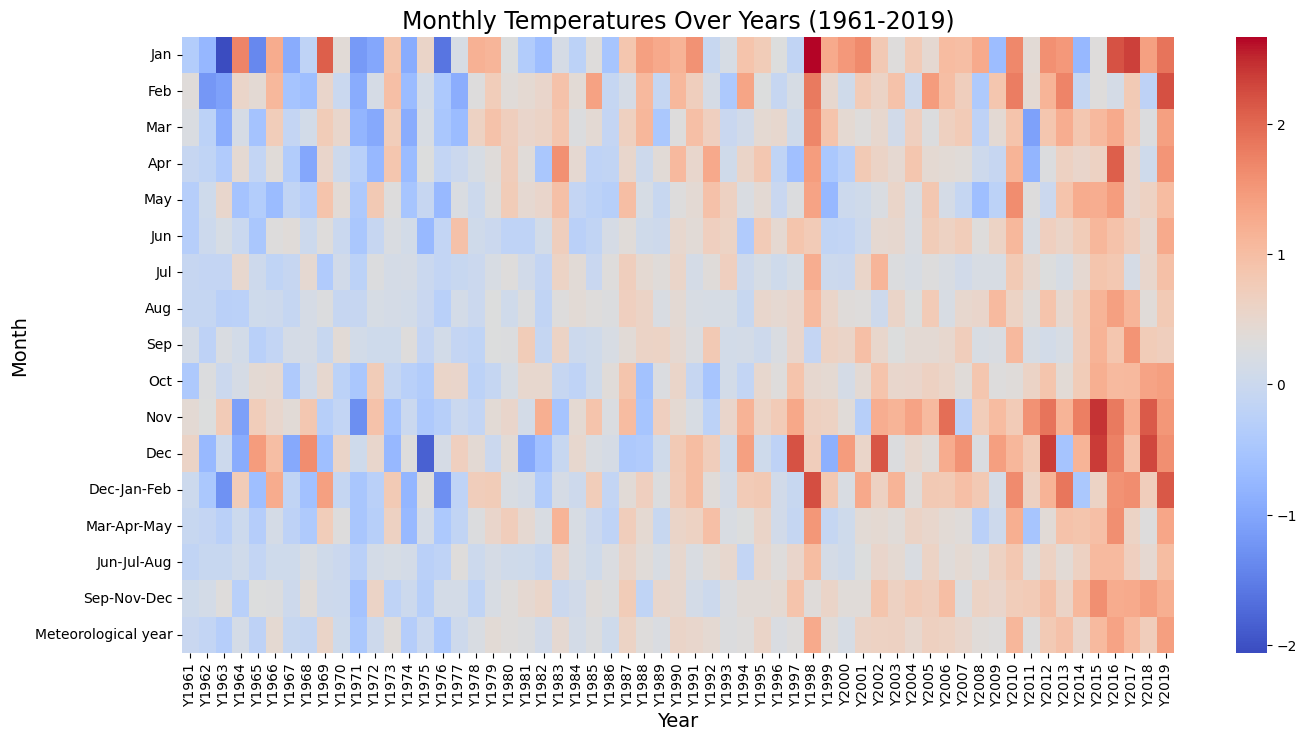

In [16]:
years = list(df_bodia_temp.columns[7:])
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec","Dec-Jan-Feb", "Mar-Apr-May", "Jun-Jul-Aug", "Sep-Nov-Dec", "Meteorological year"]
#months_dict = {month: i for i, month in enumerate(months)}

temperature_data = df_bodia_temp.iloc[:, 7:].values
temperature_data

plt.figure(figsize=(16, 8))
sns.heatmap(temperature_data, cmap="coolwarm", annot=False, cbar=True,
            xticklabels=years, yticklabels=months)
plt.title("Monthly Temperatures Over Years (1961-2019)", fontsize=17)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Month", fontsize=14)
plt.show()

*Heatmap visualization of Temperature Standard deviation*

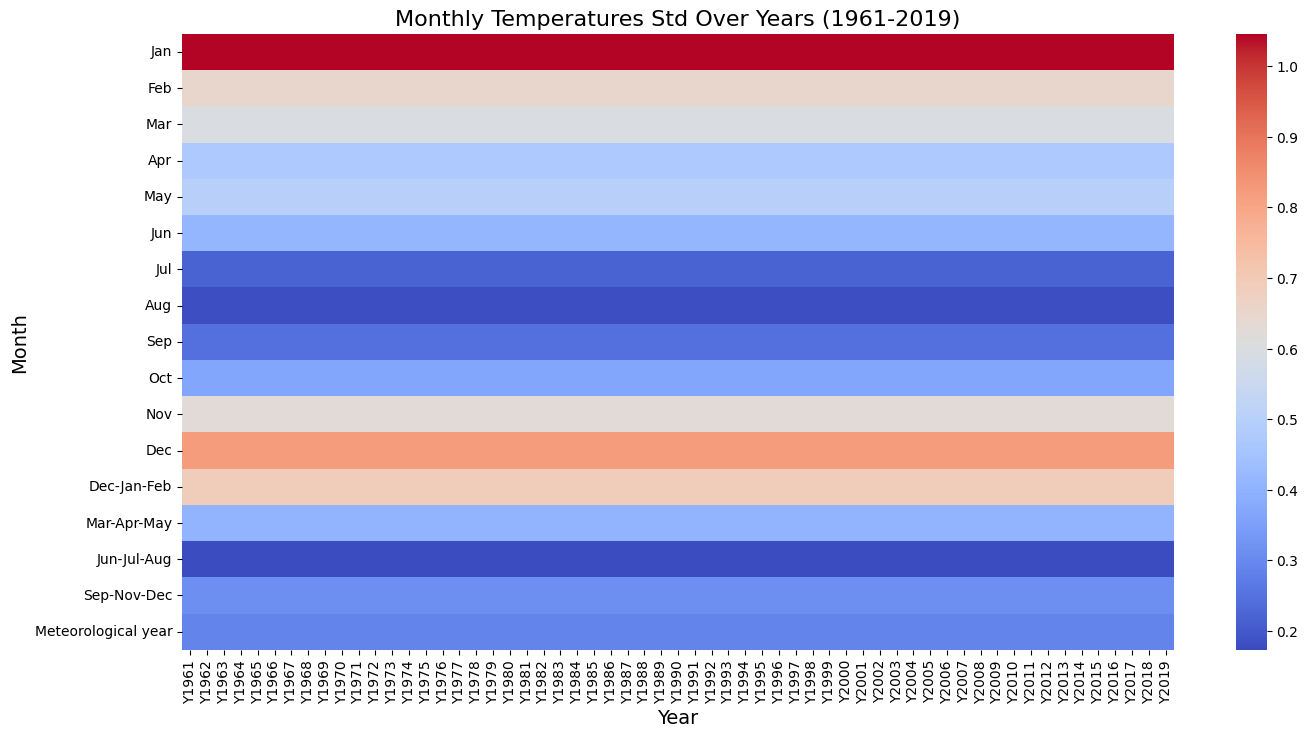

In [18]:
years = list(df_bodia_temp.columns[7:])
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec","Dec-Jan-Feb", "Mar-Apr-May", "Jun-Jul-Aug", "Sep-Nov-Dec", "Meteorological year"]
#months_dict = {month: i for i, month in enumerate(months)}

temperature_std_data = df_bodia_temp_std.iloc[:, 7:].values
temperature_std_data

plt.figure(figsize=(16, 8))
sns.heatmap(temperature_std_data, cmap="coolwarm", annot=False, cbar=True,
            xticklabels=years, yticklabels=months)
plt.title("Monthly Temperatures Std Over Years (1961-2019)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Month", fontsize=14)
plt.show()


### **3. Change Years and Temperature to columns**

*Rename feature*

In [20]:
df_bodia_temp = df_bodia_temp.rename(columns={'Area':'Country'})
#data=data[data['Element']=='Temperature change']

*Drop some Features*

In [21]:
df_bodia_temp=df_bodia_temp.drop(columns=['Area Code','Months Code','Element Code','Unit'])

*Collect data only data of 12 months*

In [22]:
df_bodia_temp_new=df_bodia_temp.loc[df_bodia_temp.Months.isin(['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])]

*The final changing*

In [23]:
df_bodia_temp_new=df_bodia_temp_new.melt(id_vars=['Country','Months','Element'],var_name='Year', value_name='df_bodia_temp_new')
df_bodia_temp_new['Year'] = df_bodia_temp_new['Year'].str[1:].astype('str')
df_bodia_temp_new.head()

,Country,Months,Element,Year,df_bodia_temp_new
0,Cambodia,January,Temperature change,1961,-0.343
1,Cambodia,February,Temperature change,1961,0.349
2,Cambodia,March,Temperature change,1961,0.231
3,Cambodia,April,Temperature change,1961,-0.080
4,Cambodia,May,Temperature change,1961,-0.319


### **5. Understand Distribution of Data**

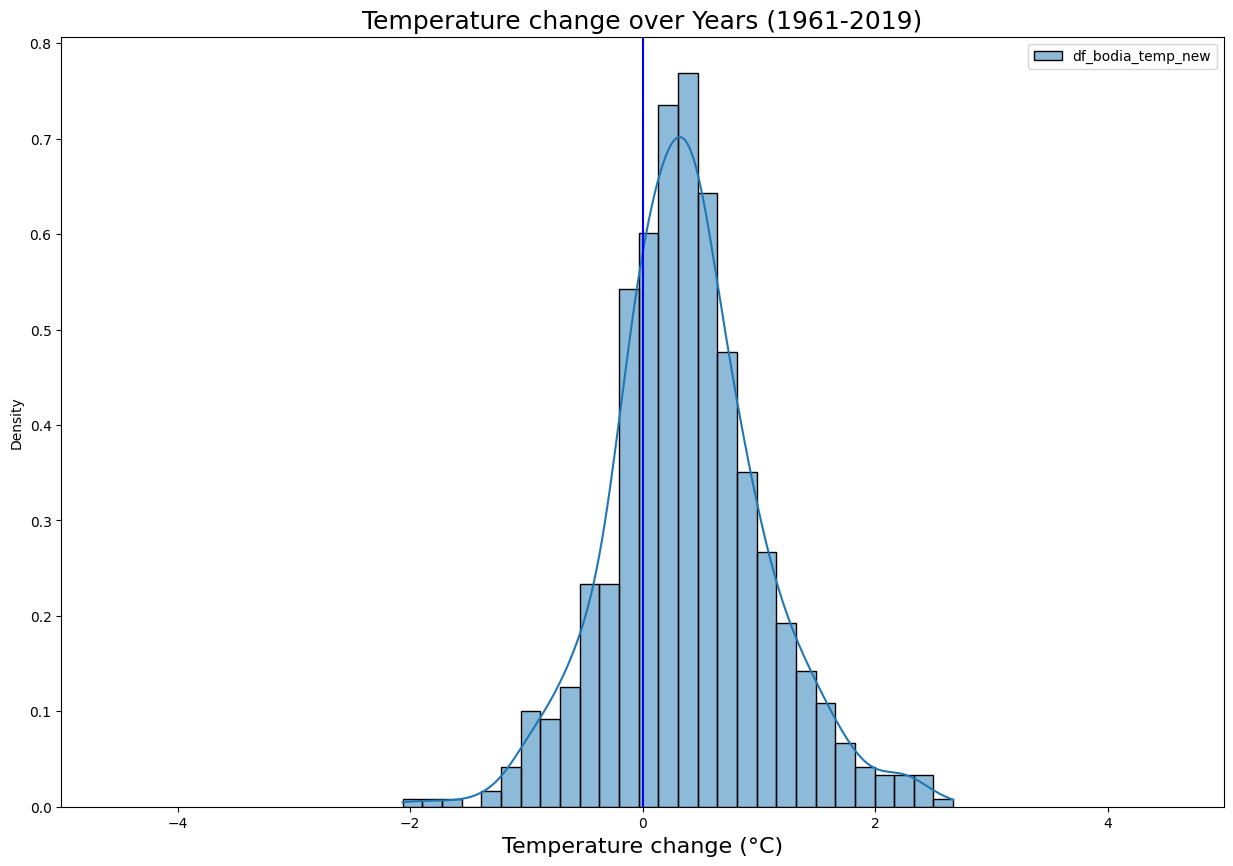

In [24]:
plt.figure(figsize=(15,10))
sns.histplot(df_bodia_temp_new.loc[df_bodia_temp_new.Element=='Temperature change'], kde=True, stat='density')
plt.axvline(x=0.0, color='b', linestyle='-')

plt.title('Temperature change over Years (1961-2019)', fontsize=18)

plt.xlabel('Temperature change (°C)', fontsize=16)
plt.xlim(-5,5)
plt.show()

### **6. Average of Temperature change in Cambodia**

*Calculate the Average temperature*

In [26]:
# Convert 'Year' column to integer for proper sorting
df_bodia_temp_new['Year'] = df_bodia_temp_new['Year'].astype(int)

# Filter data for Temperature only if needed
df_temp = df_bodia_temp_new[df_bodia_temp_new['Element'] == 'Temperature change']

# Group by 'Year' and calculate the mean
avg_temp_per_year = df_temp.groupby('Year')['df_bodia_temp_new'].mean().reset_index()

# Rename the column for clarity
avg_temp_per_year.rename(columns={'df_bodia_temp_new': 'Avg_Temperature'}, inplace=True)

# Display result
print(avg_temp_per_year)


    Year  Avg_Temperature
0   1961         0.009000
1   1962        -0.235417
2   1963        -0.259417
3   1964         0.069250
4   1965        -0.003000
5   1966         0.399917
6   1967        -0.227583
7   1968         0.114667
8   1969         0.376167
9   1970         0.161500
10  1971        -0.498083
11  1972         0.078000
12  1973         0.251667
13  1974        -0.252000
14  1975        -0.198667
15  1976        -0.283083
16  1977         0.078333
17  1978         0.191000
18  1979         0.380667
19  1980         0.370417
20  1981         0.168250
21  1982         0.116583
22  1983         0.506250
23  1984         0.177417
24  1985         0.263667
25  1986         0.050917
26  1987         0.567083
27  1988         0.336000
28  1989         0.272917
29  1990         0.640500
30  1991         0.526500
31  1992         0.420833
32  1993         0.228333
33  1994         0.442750
34  1995         0.456000
35  1996         0.220417
36  1997         0.526000
37  1998    

*Visualize the trend of average temperature*

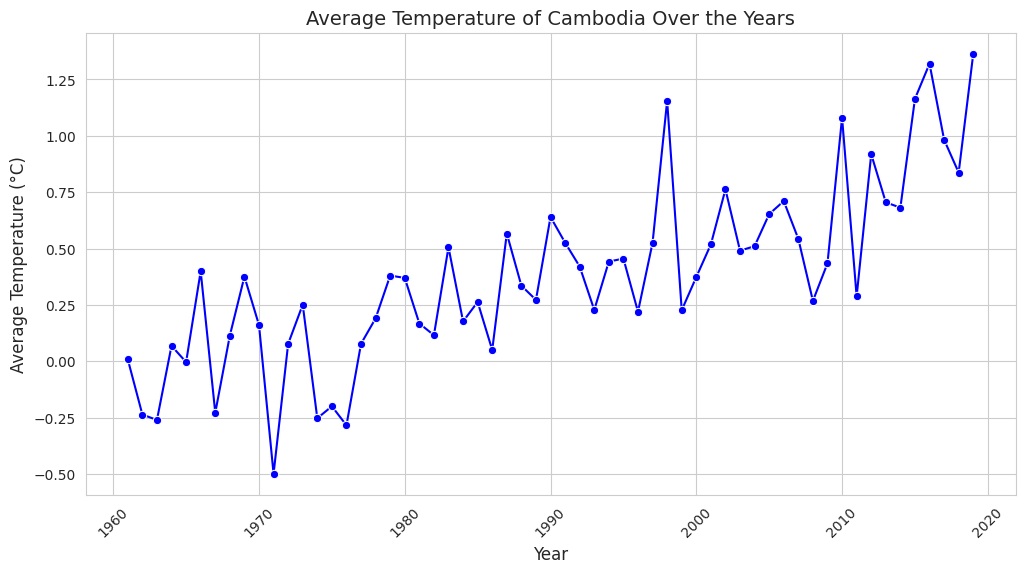

In [28]:
# Set style for better visualization
sns.set_style("whitegrid")

# Plot the average temperature over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_temp_per_year, x='Year', y='Avg_Temperature', marker='o', color='b')

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.title("Average Temperature of Cambodia Over the Years", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

### **7. Test Train and Split**

In [29]:
months ={'January':'1', 'February':'2', 'March':'3', 'April':'4', 'May':'5', 'June':'6', 'July':'7','August':'8', 'September':'9', 'October':'10', 'November':'11', 'December':'12'}
df_bodia_temp_new = df_bodia_temp_new.replace(months)

df_bodia_temp_new.head()

,Country,Months,Element,Year,df_bodia_temp_new
0,Cambodia,1,Temperature change,1961,-0.343
1,Cambodia,2,Temperature change,1961,0.349
2,Cambodia,3,Temperature change,1961,0.231
3,Cambodia,4,Temperature change,1961,-0.080
4,Cambodia,5,Temperature change,1961,-0.319


In [30]:
# Define features (X) and target (y)
X = avg_temp_per_year[['Year']]  # Independent variable
y = avg_temp_per_year['Avg_Temperature']  # Dependent variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Display the shapes of the datasets
print(f"Training set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"\nTesting set: X_test={X_test.shape}, y_test={y_test.shape}")

Training set: X_train=(47, 1), y_train=(47,)

Testing set: X_test=(12, 1), y_test=(12,)


### **8. Regression**

#### **8.1. Simple Linear Regression**

- In this example, we're using scikit-learn's LinearRegression class to create a linear regression model. 

- We generate some example data, split it into training and testing sets using train_test_split, 

- and then fit the model on the training data. 

- Next, we make predictions on the test set and calculate the mean squared error (mean_squared_error)

- and R^2 score (r2_score) to evaluate the model's accuracy. Finally, we print the results.

In [31]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LRpreds = LR.predict(X_test)

# Calculate R-squared and mean square

r2_score_lr = r2_score(y_test, LRpreds)
mse_lr = mean_squared_error(y_test, LRpreds)
mae_lr = mean_absolute_error(y_test, LRpreds)
rmse = np.sqrt(mse_lr)

print(f"R-squared (Simple Linear Regression): {r2_score_lr}")
print(f"Mean Squared Error (Simple Linear Regression): {mse_lr}")
print(f"Mean Absolute Error (Simple Linear Regression): {mae_lr}")
print(f"Root Mean Squared Error (Simple Linear Regression): {rmse}")

R-squared (Simple Linear Regression): 0.44644583327817966
Mean Squared Error (Simple Linear Regression): 0.07742299092936221
Mean Absolute Error (Simple Linear Regression): 0.23629361940213187
Root Mean Squared Error (Simple Linear Regression): 0.27824987139145674


*Visualize the data points*

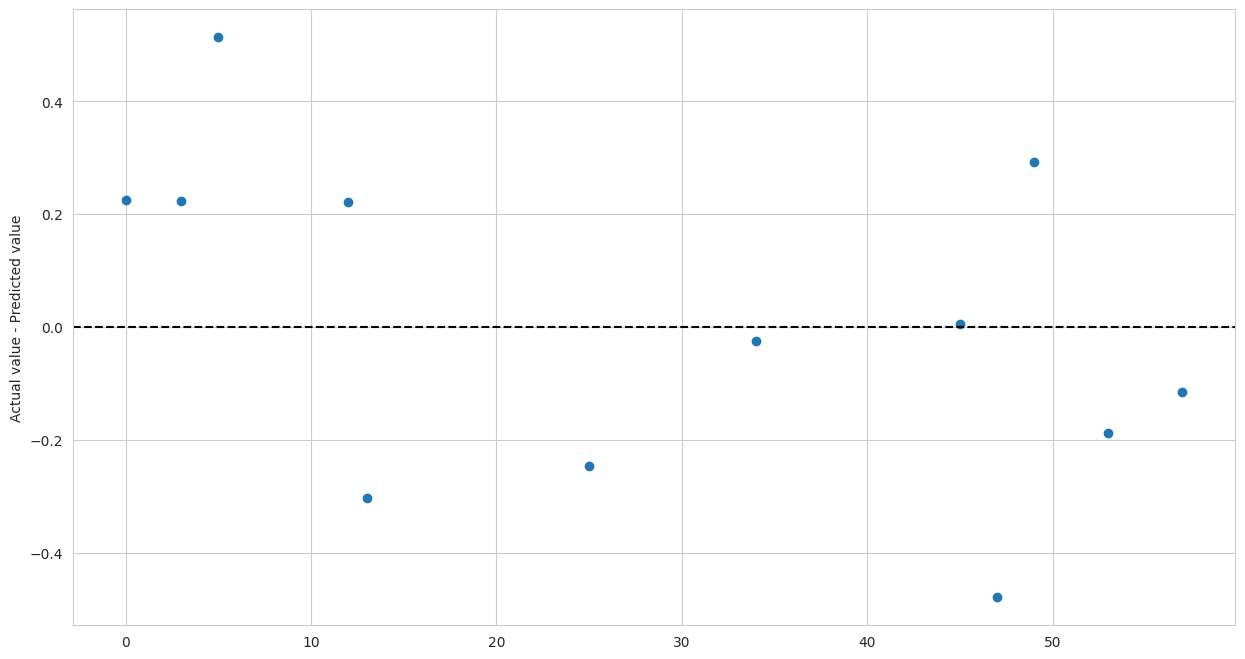

In [32]:
plt.figure(figsize=(15,8))
plt.plot(y_test-LRpreds, 'o')
plt.axhline(y=0.0, color='k', linestyle='--')
plt.ylabel('Actual value - Predicted value')
plt.show()

*Import the Linear Regression model*

In [33]:
#fit the model to the training data
LR.fit(X,y)

LinearRegression()

In [35]:
#Creating prediction data
LR_test = pd.DataFrame({'Year':np.random.randint(1980, 2060, size=1000)})
LR_test = LR_test.sort_values(by=['Year']).reset_index(drop=True).astype(str)

In [36]:
#Generate test predictios
preds_test = LR.predict(LR_test)
LR_test['df_bodia_temp_new'] = pd.Series(preds_test, index=LR_test.index)

#### **8.2. Polynomial Regression**

In [37]:
polynormial_r2 = Pipeline([('poly', PolynomialFeatures(degree=2)),
                          ('linear', LinearRegression(fit_intercept=False))])

polynormial_r3 = Pipeline([('poly', PolynomialFeatures(degree=5)),
                          ('linear', LinearRegression(fit_intercept=False))])

polynormial_r2.fit(X,y)
polynormial_r3.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression(fit_intercept=False))])

In [38]:
#Creating prediction data for Polynomial degree 2
polynormial_r2_test = pd.DataFrame({'Year' : np.random.randint(1980,2060, size = 1000)})
polynormial_r2_test = polynormial_r2_test.sort_values(by=['Year']).reset_index(drop=True).astype(str)


#Creating prediction data for Polynormial degree 5
polynormial_r3_test = pd.DataFrame({'Year' : np.random.randint(1980,2060, size = 1000)})
polynormial_r3_test = polynormial_r3_test.sort_values(by=['Year']).reset_index(drop=True).astype(str)


In [39]:
#Generate test predictions
preds2_test = polynormial_r2.predict(polynormial_r2_test)
preds3_test = polynormial_r3.predict(polynormial_r3_test)

polynormial_r2_test['df_bodia_temp_new'] = pd.Series(preds2_test, index=polynormial_r2_test.index)
polynormial_r3_test['df_bodia_temp_new'] = pd.Series(preds3_test, index=polynormial_r3_test.index)

*Visualize the final trend*

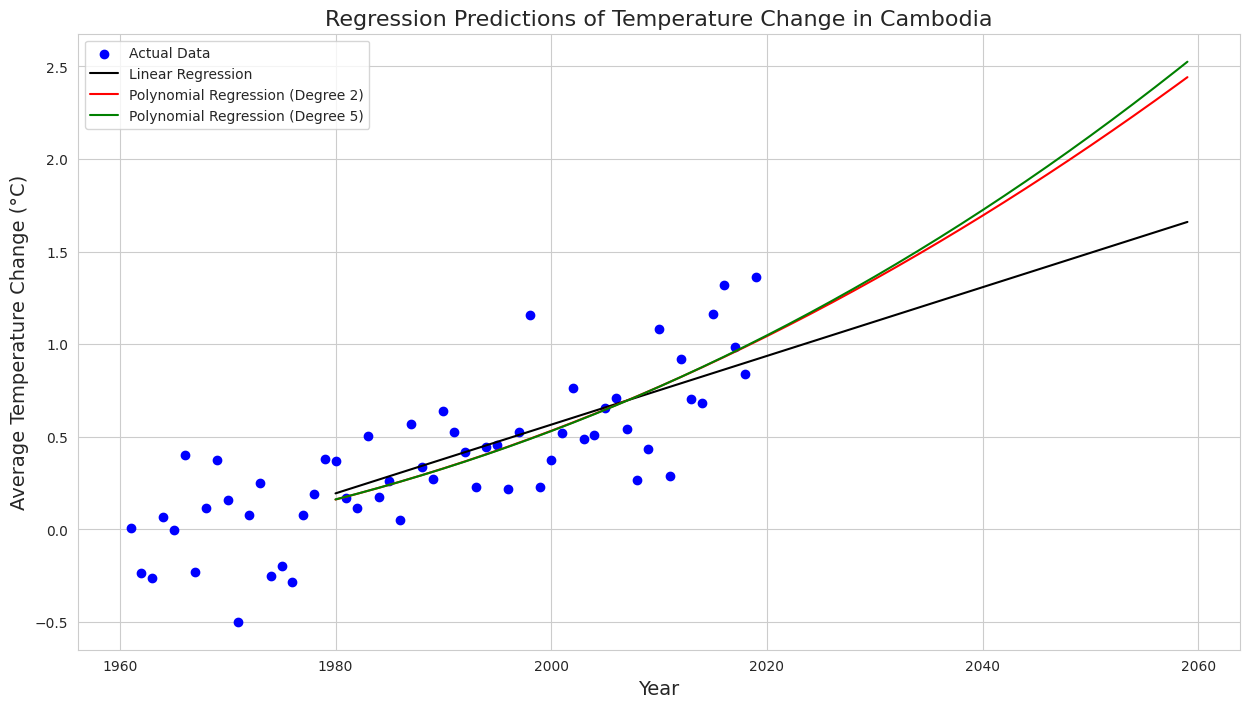

In [40]:
# Plot the polynomial regression predictions
plt.figure(figsize=(15, 8))

# Plot the actual data points
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot the polynomial regression predictions
plt.plot(LR_test['Year'].astype(int), preds_test,color='black', label='Linear Regression')
plt.plot(polynormial_r2_test['Year'].astype(int), preds2_test, color='red', label='Polynomial Regression (Degree 2)')
plt.plot(polynormial_r3_test['Year'].astype(int), preds3_test, color='green', label='Polynomial Regression (Degree 5)')

# Labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature Change (°C)', fontsize=14)
plt.title('Regression Predictions of Temperature Change in Cambodia', fontsize=16)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

*Prediction Example*

In [44]:
# Filter and print the prediction data for the year 2030
year_to_predict = 2030

# Linear Regression prediction for 2030
lr_prediction = preds_test[LR_test['Year'].astype(int) == year_to_predict]
print(f"Linear Regression Prediction for {year_to_predict}: {lr_prediction[0] if lr_prediction.size > 0 else 'No data available'}")

# Polynomial Regression (Degree 2) prediction for 2030
poly2_prediction = preds2_test[polynormial_r2_test['Year'].astype(int) == year_to_predict]
print(f"Polynomial Regression (Degree 2) Prediction for {year_to_predict}: {poly2_prediction[0] if poly2_prediction.size > 0 else 'No data available'}")

# Polynomial Regression (Degree 5) prediction for 2030
poly5_prediction = preds3_test[polynormial_r3_test['Year'].astype(int) == year_to_predict]
print(f"Polynomial Regression (Degree 5) Prediction for {year_to_predict}: {poly5_prediction[0] if poly5_prediction.size > 0 else 'No data available'}")

Linear Regression Prediction for 2030: 1.122409848042082
Polynomial Regression (Degree 2) Prediction for 2030: 1.3514016423299076
Polynomial Regression (Degree 5) Prediction for 2030: 1.3651340703100914


### **9. Conclusion**

Based on the trends observed in our regression analysis and predictions:

***Rising Temperature Trend:*** The actual data and regression models (linear and polynomial) likely indicate a consistent increase in average temperature change over the years. This suggests that **Cambodia is experiencing a warming trend, which aligns with global climate change patterns.**

***Model Accuracy:*** The polynomial regression models (especially higher-degree ones) may fit the data more closely than the linear regression model, capturing non-linear trends in temperature change. This indicates that **temperature changes may not be strictly linear over time.**

***Future Predictions:*** If the models predict a significant increase in temperature by 2030 or beyond, it highlights the urgency of addressing climate change impacts in Cambodia. This could include mitigation strategies like reducing greenhouse gas emissions and adapting to the effects of rising temperatures.

***Uncertainty:*** While the models provide predictions, they are based on historical data and assumptions. External factors, such as policy changes or natural events, could influence future trends.

**Final Conclusion:**
The analysis suggests a clear upward trend in temperature change in Cambodia, emphasizing the need for proactive measures to combat climate change. **The predictions for future years, such as 2030, serve as a warning for potential environmental and societal impacts if current trends continue.**
